## 2.6 Dashboards with Streamlit

### Import Libraries and Data

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Priya/CF Work/NY_Citi_Bikes/Data/nyc_data.csv', index_col = 0)

In [3]:
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  CA5837152804D4B5  electric_bike  2022-01-26 18:50:39  2022-01-26 18:51:53   
1  BA06A5E45B6601D2   classic_bike  2022-01-28 13:14:07  2022-01-28 13:20:23   
2  7B6827D7B9508D93   classic_bike  2022-01-10 19:55:13  2022-01-10 20:00:37   
3  6E5864EA6FCEC90D  electric_bike  2022-01-26 07:54:57  2022-01-26 07:55:22   
4  E24954255BBDE32D  electric_bike  2022-01-13 18:44:46  2022-01-13 18:45:43   

     start_station_name start_station_id      end_station_name end_station_id  \
0  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
1      Essex Light Rail            JC038      Essex Light Rail          JC038   
2      Essex Light Rail            JC038      Essex Light Rail          JC038   
3  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
4  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   

   start_lat  start_lng    end_lat    end_lng member_casual  \
0  40.750604 -74.024020  40.750604 -74.024020        member   
1  40.712774 -74.036486  40.712774 -74.036486        member   
2  40.712774 -74.036486  40.712774 -74.036486        member   
3  40.750604 -74.024020  40.750604 -74.024020        member   
4  40.750604 -74.024020  40.750604 -74.024020        member   

            start_time        date             end_time  avgTemp _merge  
0  2022-01-26 18:50:39  2022-01-26  2022-01-26 18:51:53     -2.3   both  
1  2022-01-28 13:14:07  2022-01-28  2022-01-28 13:20:23      0.1   both  
2  2022-01-10 19:55:13  2022-01-10  2022-01-10 20:00:37      1.6   both  
3  2022-01-26 07:54:57  2022-01-26  2022-01-26 07:55:22     -2.3   both  
4  2022-01-13 18:44:46  2022-01-13  2022-01-13 18:45:43      4.0   both

### Data Wrangling

In [4]:
# Create a month column 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [5]:
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  CA5837152804D4B5  electric_bike  2022-01-26 18:50:39  2022-01-26 18:51:53   
1  BA06A5E45B6601D2   classic_bike  2022-01-28 13:14:07  2022-01-28 13:20:23   
2  7B6827D7B9508D93   classic_bike  2022-01-10 19:55:13  2022-01-10 20:00:37   
3  6E5864EA6FCEC90D  electric_bike  2022-01-26 07:54:57  2022-01-26 07:55:22   
4  E24954255BBDE32D  electric_bike  2022-01-13 18:44:46  2022-01-13 18:45:43   

     start_station_name start_station_id      end_station_name end_station_id  \
0  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
1      Essex Light Rail            JC038      Essex Light Rail          JC038   
2      Essex Light Rail            JC038      Essex Light Rail          JC038   
3  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
4  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   

   start_lat  start_lng    end_lat    end_lng member_casual  \
0  40.750604 -74.024020  40.750604 -74.024020        member   
1  40.712774 -74.036486  40.712774 -74.036486        member   
2  40.712774 -74.036486  40.712774 -74.036486        member   
3  40.750604 -74.024020  40.750604 -74.024020        member   
4  40.750604 -74.024020  40.750604 -74.024020        member   

            start_time       date             end_time  avgTemp _merge  month  
0  2022-01-26 18:50:39 2022-01-26  2022-01-26 18:51:53     -2.3   both      1  
1  2022-01-28 13:14:07 2022-01-28  2022-01-28 13:20:23      0.1   both      1  
2  2022-01-10 19:55:13 2022-01-10  2022-01-10 20:00:37      1.6   both      1  
3  2022-01-26 07:54:57 2022-01-26  2022-01-26 07:55:22     -2.3   both      1  
4  2022-01-13 18:44:46 2022-01-13  2022-01-13 18:45:43      4.0   both      1

In [6]:
# Create the season column

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 2)
    else "spring" if (3 < month <= 5)
    else "summer" if (6 <= month <= 8)
    else "fall"
for month in df['month']
    ]

In [7]:
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  CA5837152804D4B5  electric_bike  2022-01-26 18:50:39  2022-01-26 18:51:53   
1  BA06A5E45B6601D2   classic_bike  2022-01-28 13:14:07  2022-01-28 13:20:23   
2  7B6827D7B9508D93   classic_bike  2022-01-10 19:55:13  2022-01-10 20:00:37   
3  6E5864EA6FCEC90D  electric_bike  2022-01-26 07:54:57  2022-01-26 07:55:22   
4  E24954255BBDE32D  electric_bike  2022-01-13 18:44:46  2022-01-13 18:45:43   

     start_station_name start_station_id      end_station_name end_station_id  \
0  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
1      Essex Light Rail            JC038      Essex Light Rail          JC038   
2      Essex Light Rail            JC038      Essex Light Rail          JC038   
3  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
4  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   

   start_lat  start_lng    end_lat    end_lng member_casual  \
0  40.750604 -74.024020  40.750604 -74.024020        member   
1  40.712774 -74.036486  40.712774 -74.036486        member   
2  40.712774 -74.036486  40.712774 -74.036486        member   
3  40.750604 -74.024020  40.750604 -74.024020        member   
4  40.750604 -74.024020  40.750604 -74.024020        member   

            start_time       date             end_time  avgTemp _merge  month  \
0  2022-01-26 18:50:39 2022-01-26  2022-01-26 18:51:53     -2.3   both      1   
1  2022-01-28 13:14:07 2022-01-28  2022-01-28 13:20:23      0.1   both      1   
2  2022-01-10 19:55:13 2022-01-10  2022-01-10 20:00:37      1.6   both      1   
3  2022-01-26 07:54:57 2022-01-26  2022-01-26 07:55:22     -2.3   both      1   
4  2022-01-13 18:44:46 2022-01-13  2022-01-13 18:45:43      4.0   both      1   

   season  
0  winter  
1  winter  
2  winter  
3  winter  
4  winter

### Create Plotly Charts

In [8]:
# Sidebar for navigation

st.sidebar.title("Jersey City Bike Dashboard")
option = st.sidebar.selectbox(
    "Choose a visualization:",
    ("Top 20 Bike Stations", "Daily Bike Rides and Temperature")
)

2024-12-06 22:14:24.676 
  command:

    streamlit run C:\Users\Priya\anaconda3\envs\NY_Citi_Bikes\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [9]:
def plot_bar_chart(df):
# Add a 'value' column for counting purposes
    df['value'] = 1

df['value'] = 1 
# Group by 'start_station_name' and calculate the sum of the 'value' column
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})

# Get the top 20 stations with the highest number of trips
top20 = df_groupby_bar.nlargest(20, 'value')

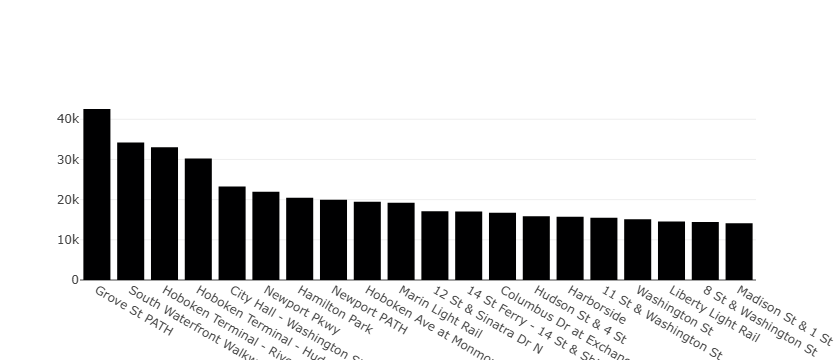

In [10]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

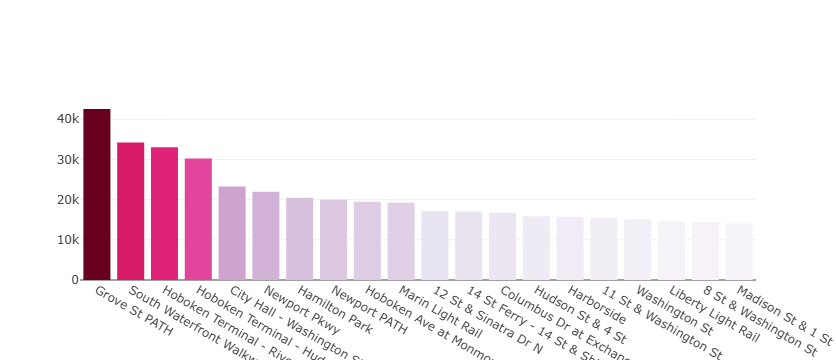

In [11]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'PuRd'}))
fig.show()

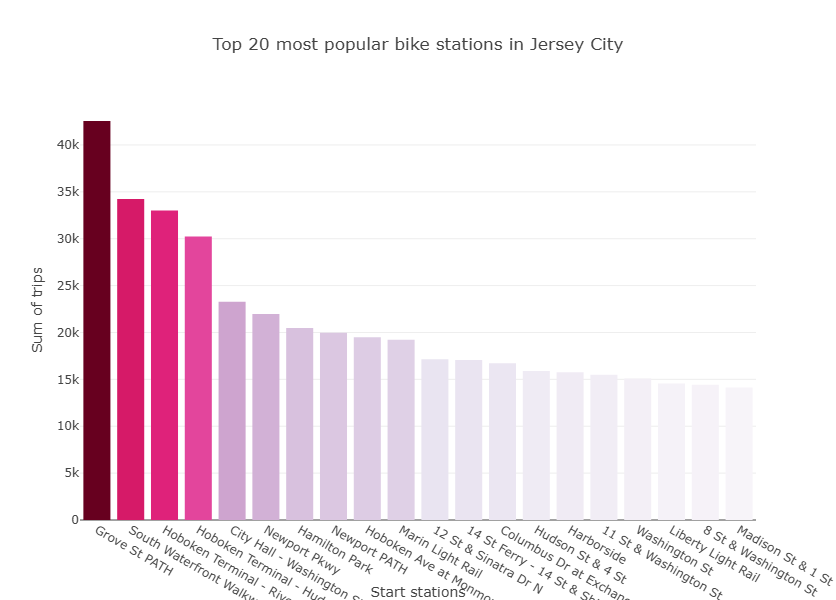

In [12]:
## Bar chart

fig.update_layout(
    title = 'Top 20 most popular bike stations in Jersey City',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600
)

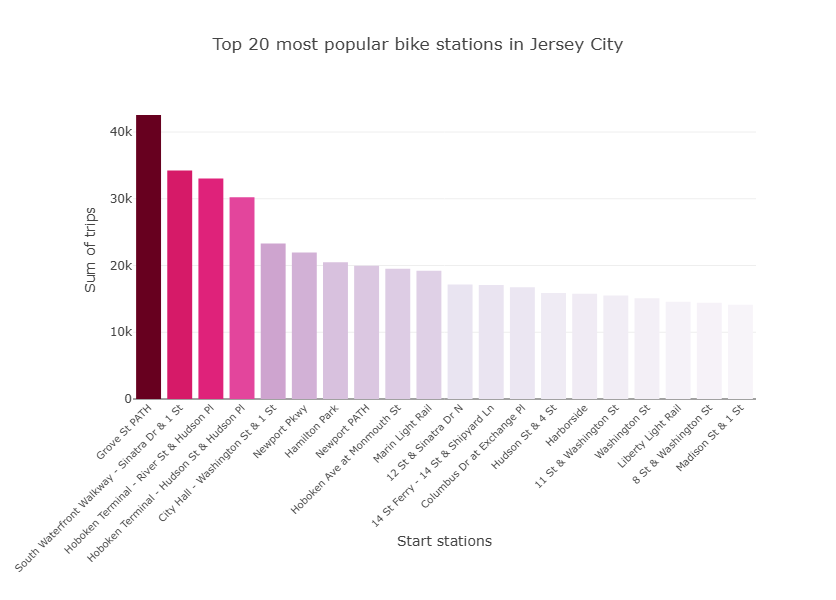

In [12]:
# Update layout to provide more space for the station names
fig.update_layout(
    title='Top 20 most popular bike stations in Jersey City',
    xaxis_title='Start stations',
    yaxis_title='Sum of trips',
    width=900,  # Adjust the width of the plot
    height=600,  # Adjust the height of the plot
    margin=dict(b=200),  # Increase bottom margin to provide more space for x-axis labels
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for better readability
        automargin=True,  # Automatically adjust margins to fit labels
        tickfont=dict(size=10)  # Adjust font size for x-axis labels
    )
)

In [13]:
top20.to_csv('C:/Users/Priya/CF Work/NY_Citi_Bikes/top_20.csv')

### Line Chart

#### Some Wrangling Required

In [15]:
def plot_line_chart(df):
# Groupby the count of the trips for Line Chart

    df_group = pd.DataFrame(df.groupby('date').agg({'ride_id':'count','avgTemp':'mean'})).reset_index()

# avgTemp needs aggregate function here because of groupby 'date'

In [16]:
df_group.head()

date  ride_id  avgTemp
0 2022-01-01      592     11.6
1 2022-01-02     1248     11.4
2 2022-01-03      832      1.4
3 2022-01-04      934     -2.7
4 2022-01-05      914      3.2

In [17]:
# Create subplots with a secondary y-axis for temperature

fig_2 = make_subplots(specs=[[{"secondary_y": True}]])

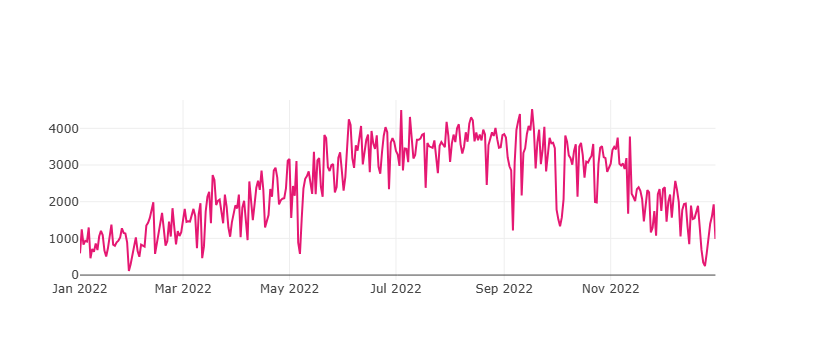

In [18]:
# Add the first trace for daily bike rides
fig_2.add_trace(
        go.Scatter(
            x=df_group['date'],
            y=df_group['ride_id'],
            name='Daily Bike Rides',
            marker=dict(color='#e51872'), 
            text=df_group['ride_id'],  # Add tooltips for ride count
            hoverinfo='text+x+y'  # Show text on hover
        ), 
        secondary_y=False
    )

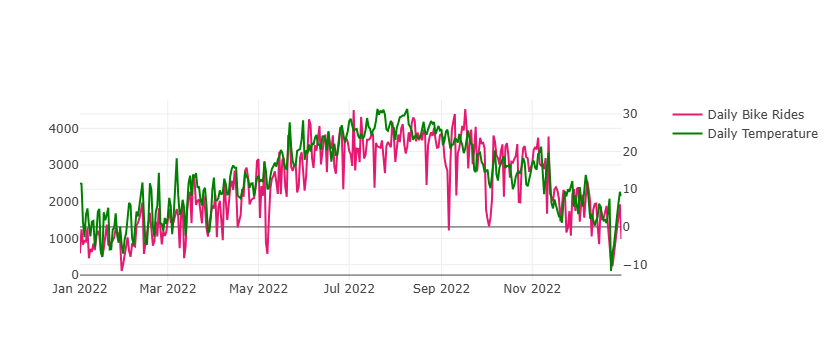

In [19]:
# Add the second trace for daily temperature
fig_2.add_trace(
        go.Scatter(
            x=df_group['date'],
            y=df_group['avgTemp'],
            name='Daily Temperature',
            marker=dict(color='Green'),
            text=df_group['avgTemp'],  # Add tooltips for temperature
            hoverinfo='text+x+y'  # Show text on hover
        ), 
        secondary_y=True
    )

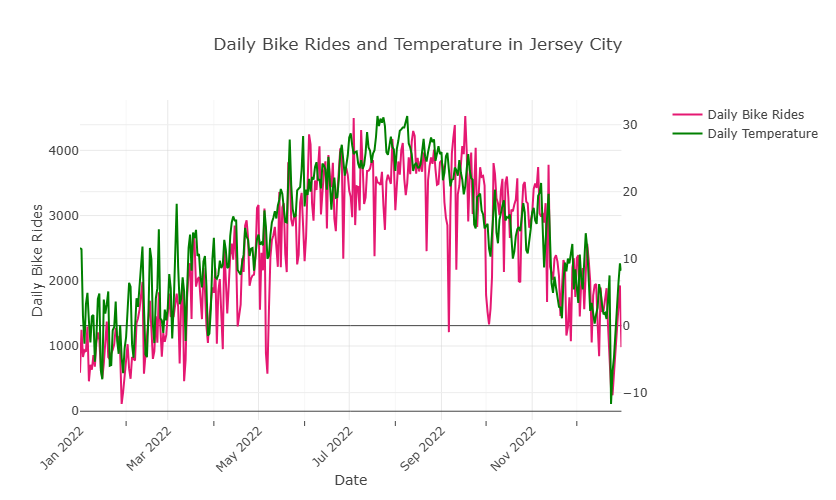

In [20]:
# Update layout with titles and dimensions
# Update layout to provide gridlines and minor ticks

fig_2.update_layout(
        title='Daily Bike Rides and Temperature in Jersey City', 
        xaxis_title='Date',
        yaxis_title='Daily Bike Rides',
        height=500,
        xaxis=dict(
            showgrid=True,  # Show major gridlines
            gridcolor='LightGrey',  # Set gridline color
            gridwidth=0.5,  # Set gridline width
            tickangle=-45,  # Angle the ticks for better readability
            showticklabels=True,  # Ensure tick labels are shown
            tickmode='auto',  # Allow automatic tick placement
            dtick='M1',  # Set the tick frequency (e.g., monthly ticks)
            minor=dict(
                ticklen=5,  # Minor tick length
                showgrid=True,  # Show minor gridlines
                gridcolor='LightGrey',  # Minor gridline color
                gridwidth=0.2  # Minor gridline width
            )
        ),
        yaxis=dict(
            showgrid=True,  # Show major gridlines on the y-axis
            gridcolor='LightGrey',  # Gridline color
            gridwidth=0.5  # Gridline width
        )
    )

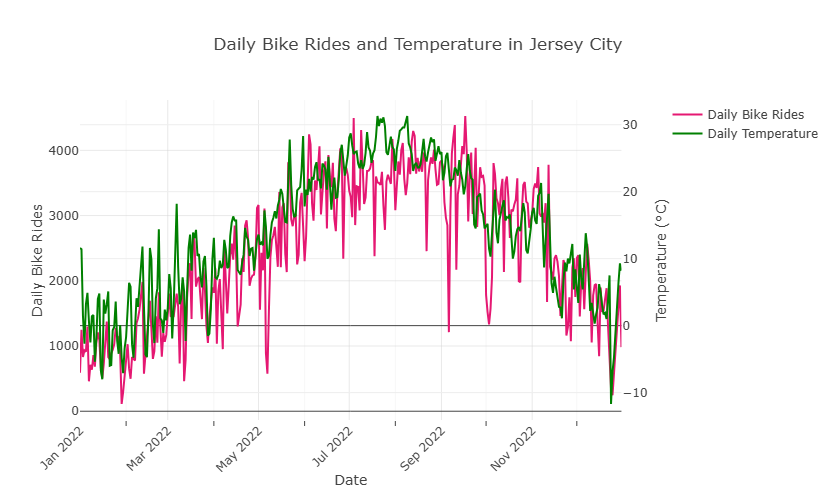

In [21]:
# Update secondary y-axis title

fig_2.update_yaxes(title_text='Temperature (°C)', secondary_y=True)

In [22]:
# Calculate min and max for ride counts and temperature
min_ride = df_group['ride_id'].min()
max_ride = df_group['ride_id'].max()
min_temp = df_group['avgTemp'].min()
max_temp = df_group['avgTemp'].max()

In [23]:
# Find the corresponding dates for the min and max values
min_ride_date = df_group.loc[df_group['ride_id'] == min_ride, 'date'].values[0]
max_ride_date = df_group.loc[df_group['ride_id'] == max_ride, 'date'].values[0]
min_temp_date = df_group.loc[df_group['avgTemp'] == min_temp, 'date'].values[0]
max_temp_date = df_group.loc[df_group['avgTemp'] == max_temp, 'date'].values[0]

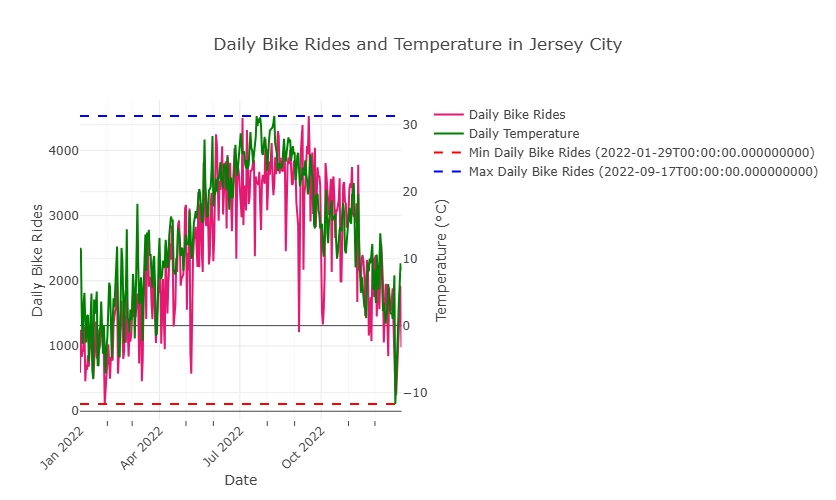

In [24]:
#Add horizontal lines for min and max bike rides
fig_2.add_trace(
        go.Scatter(
            x=[df_group['date'].min(), df_group['date'].max()],
            y=[min_ride, min_ride],
            mode="lines",
            name=f"Min Daily Bike Rides ({min_ride_date})",
            line=dict(dash="dash", color="red")
        ),
        secondary_y=False
    )
fig_2.add_trace(
        go.Scatter(
            x=[df_group['date'].min(), df_group['date'].max()],
            y=[max_ride, max_ride],
            mode="lines",
            name=f"Max Daily Bike Rides ({max_ride_date})",
            line=dict(dash="dash", color="blue")
        ),
        secondary_y=False
    )

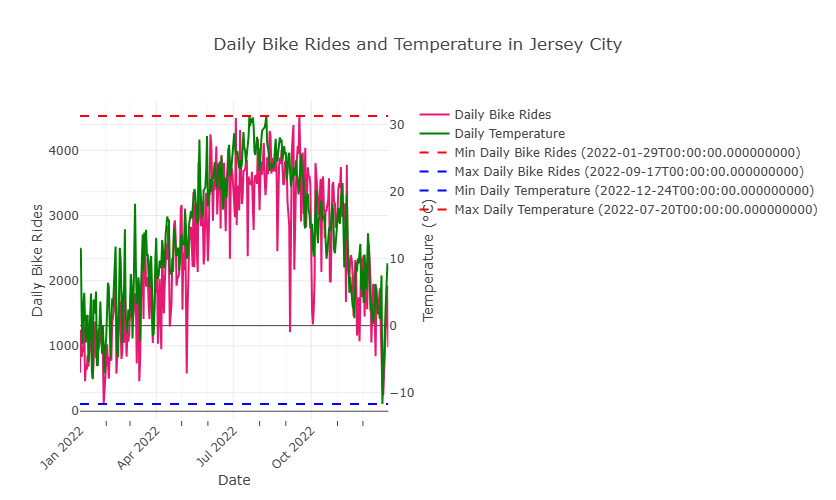

In [25]:
# Add horizontal lines for min and max temperature
fig_2.add_trace(
        go.Scatter(
            x=[df_group['date'].min(), df_group['date'].max()],
            y=[min_temp, min_temp],
            mode="lines",
            name=f"Min Daily Temperature ({min_temp_date})",
            line=dict(dash="dash", color="blue")
        ),
        secondary_y=True
    )
fig_2.add_trace(
        go.Scatter(
            x=[df_group['date'].min(), df_group['date'].max()],
            y=[max_temp, max_temp],
            mode="lines",
            name=f"Max Daily Temperature ({max_temp_date})",
            line=dict(dash="dash", color="red")
        ),
        secondary_y=True
    )

In [26]:
#Example: Add marker annotations for specific key dates
key_dates = ['2022-01-01', '2022-12-01']  # Add dates where bike rides or temperature variations are significant

In [27]:
for date in key_dates:
    fig_2.add_annotation(
            x=date,
            y=df_group.loc[df_group['date'] == date, 'ride_id'].values[0],  # Use the correct y value for the annotation
            text=f"Peak: {date}",
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowcolor='red',
            bgcolor='yellow',
            font=dict(size=12, color='black'),
            align='center'
        )

In [28]:
# Display the plot

st.plotly_chart(fig_2, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [29]:
# Main part of the app
if option == "Top 20 Bike Stations":
    plot_bar_chart(df)
elif option == "Daily Bike Rides and Temperature":
    plot_line_chart(df)

In [30]:
df_group.to_csv('daily_rides_and_temperature.csv')

## Kepler map context description
### Kepler Map: Visualizing Bike Ride Locations in Jersey City
#### Three Main Hubs
#### There are three main hubs for bike usage (which are visible by observing the 'route arcs'). 'Hub 1' around in the area of Hoboken Terminal and Yards/Stevens Institute of Technology (parallel to the Meatpacking District in Manhattan); 'Hub 2' south (slightly west of what is labeled Downtown Jersey City); and smaller 'Hub 3' furhter west (near Indian Square). I will focus my insights mostly on Hub 1 and 2. There is also a much smaller Hub 4 in downtown Jersey City, by the water (parallel to Battery City Park in Manhattan).